In [81]:
import numpy as np
from graphs_utils import generate_graphs_for_data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import qmc

# My modules
from generator import LCGenerator, MTGenerator

# Generator Test
This notebook will be testing the correctness and quality of the generator objects that generates random numbers from various distributions.

# Will be using tests to find out how random the numbers really are

In [82]:
lc_gen = LCGenerator(12345678)
mt_gen = MTGenerator(12345678)
sobol_engine = qmc.Sobol(d=1, scramble=False)

In [83]:
n = 2 << 8
start = 0
end = 100
random_doubles_mt = np.array([mt_gen.next_double_from_to(end=end) for _ in range(0, n)])
random_doubles_lc = np.array([lc_gen.next_double_from_to(end=end) for _ in range(0, n)])

# Generate quasi-random points in [0, 1)
sobol_points = sobol_engine.random(n)
# Scale to [start, end]
random_doubles_q = sobol_points.flatten() * (end - start) + start

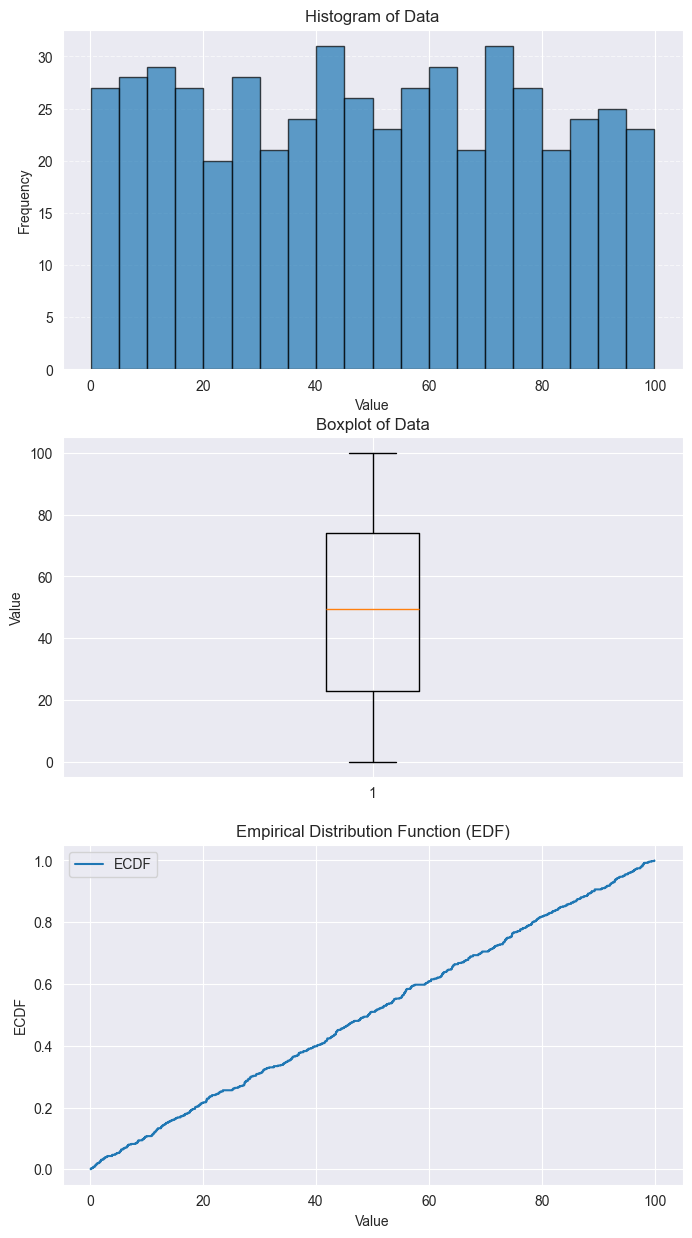

In [84]:
generate_graphs_for_data(random_doubles_lc)

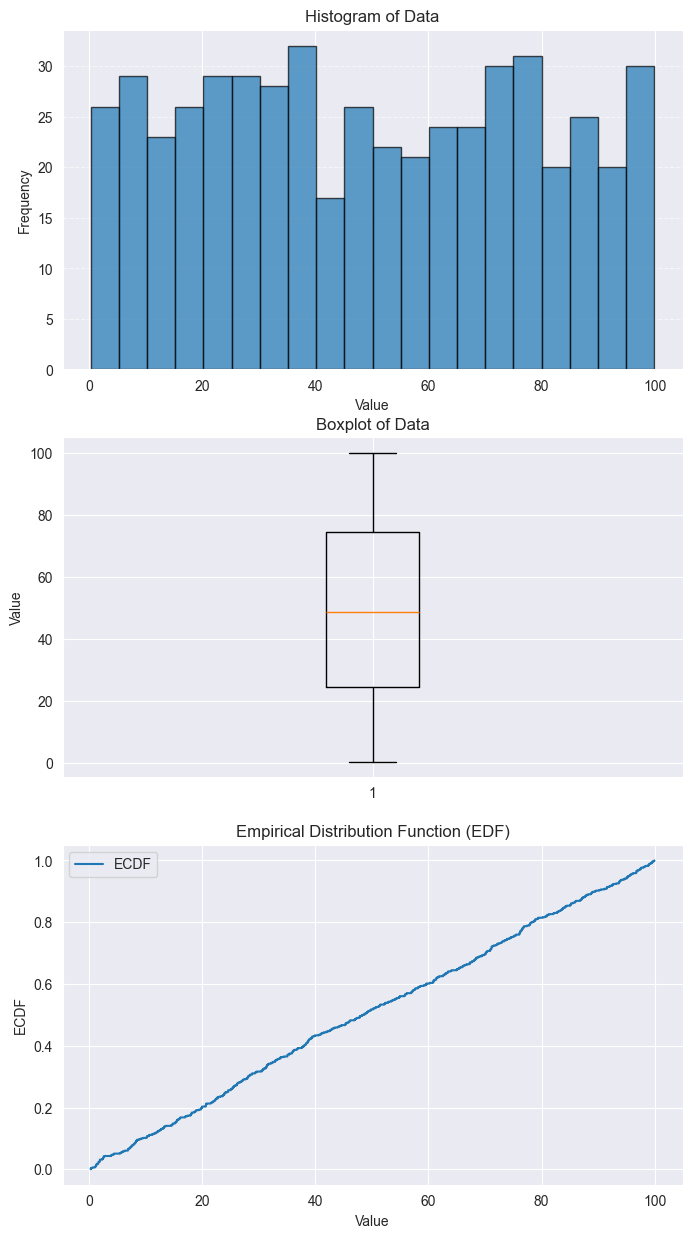

In [85]:
generate_graphs_for_data(random_doubles_mt)

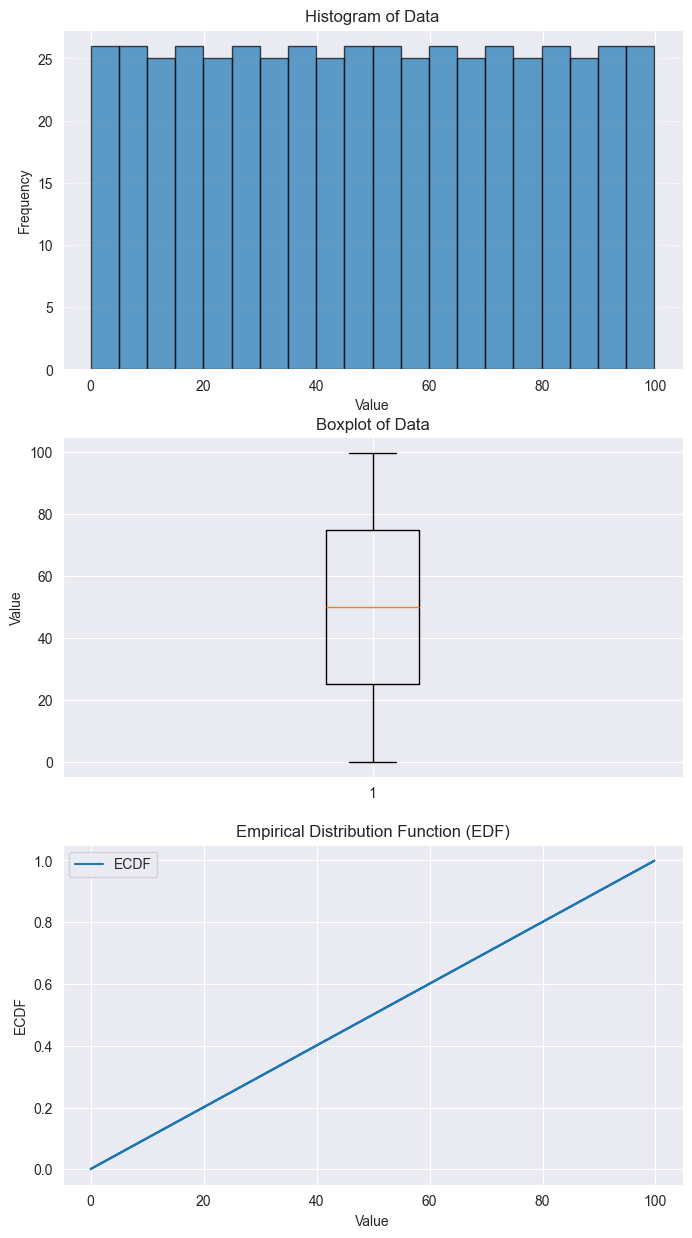

In [86]:
generate_graphs_for_data(random_doubles_q)

In [87]:
# Auto-Correlation as a Matrix
# Build a 2D matrix of lagged values
X1 = np.vstack([random_doubles_lc[:-1], random_doubles_lc[1:]])
X2 = np.vstack([random_doubles_mt[:-1], random_doubles_mt[1:]])
X3 = np.vstack([random_doubles_q[:-1], random_doubles_q[1:]])

# Compute correlation matrix
corr_matrix_lc = np.corrcoef(X1)
corr_matrix_mt = np.corrcoef(X2)
corr_matrix_q = np.corrcoef(X3)

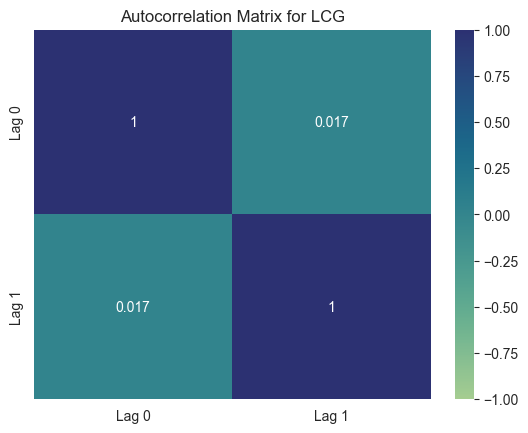

In [88]:
# Plot as heatmap
sns.heatmap(corr_matrix_lc, annot=True, cmap='crest', vmin=-1, vmax=1,
            xticklabels=["Lag 0", "Lag 1"], yticklabels=["Lag 0", "Lag 1"])
plt.title("Autocorrelation Matrix for LCG")
plt.show()

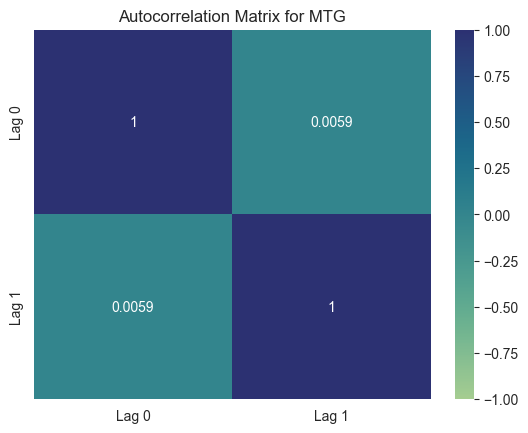

In [89]:
sns.heatmap(corr_matrix_mt, annot=True, cmap='crest', vmin=-1, vmax=1,
            xticklabels=["Lag 0", "Lag 1"], yticklabels=["Lag 0", "Lag 1"])
plt.title("Autocorrelation Matrix for MTG")
plt.show()

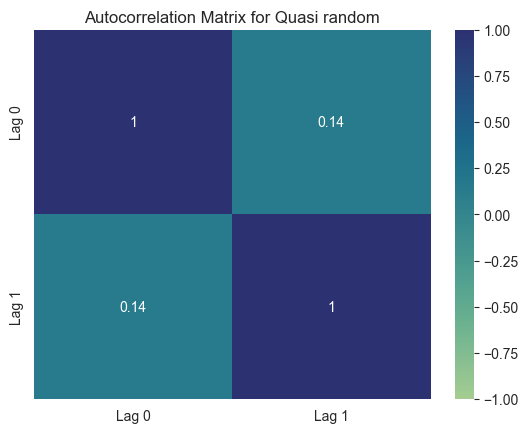

In [90]:
sns.heatmap(corr_matrix_q, annot=True, cmap='crest', vmin=-1, vmax=1,
            xticklabels=["Lag 0", "Lag 1"], yticklabels=["Lag 0", "Lag 1"])
plt.title("Autocorrelation Matrix for Quasi random")
plt.show()